In [1]:
import os

import numpy as np

from matplotlib import pyplot as plt

# DataBase

In [2]:
%%capture

from djimaging.user.alpha.utils import database

# Choose indicator by uncommenting one of the following lines
#indicator = 'calcium'
indicator = 'glutamate'

database.connect_dj(indicator=indicator)

In [3]:
df_morph = database.get_morph_df()

# Plot

In [4]:
from alphaanalysis import plot as plota

plota.set_default_params(kind='paper')

In [5]:
FIGURE_FOLDER = './figures/'

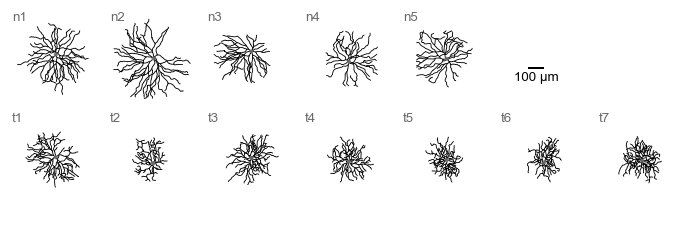

In [6]:
order_groups_by = 'cell_tag'

fig, axs = plota.plot_all_morphologies(
    df_morph=df_morph, order_groups_by=order_groups_by,
    figsize=(5.7, 0.3 + 0.69 * df_morph['group'].nunique()), min_cols=7,
    DEBUG=False, verbose=False, plot_side_views=False, plot_names=True,
    order=plota.get_order(indicator))

if indicator == 'glutamate':
    plota.plot_scale_bar(ax=axs[0, -2], x0=-100, y0=-100, size=100, pad=-20, text="100 µm")
else:
    plota.plot_scale_bar(ax=axs[0, -1], x0=-100, y0=-100, size=100, pad=-20, text="100 µm")

for ax in axs.flat:
    ax.set_xlim(-270, 250)

fig.savefig(os.path.join(FIGURE_FOLDER, f'morphology_{indicator}.pdf'))

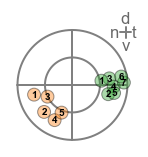

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.3, 1.3))

plota.plot_cell_locations(
    df_morph,
    indicator=indicator,
    text=False,
    alpha=0.4,
    ax=ax,
    s=60,
    legend=False,
)

y_mean = np.mean(df_morph.ventral_dorsal_pos)
y_std = np.std(df_morph.ventral_dorsal_pos)

groups = df_morph.groupby('group')
for i, (group_name, group) in enumerate(groups):
    for j, (row_name, row) in enumerate(group.sort_values(order_groups_by, ascending=False).iterrows()):
        xy = np.array([-row['temporal_nasal_pos'], row['ventral_dorsal_pos']])
        ax.text(xy[0], xy[1], row[order_groups_by][len(group_name):], ha='center', va='center', c='k', fontsize=6,
                zorder=1000, fontweight='bold')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset_ax = inset_axes(ax, width='10%', height='10%', loc='upper right', borderpad=0.1)
plota.plot_location_grid(inset_ax, text=True, left='n', right='t', top='d', bottom='v', plot_circles=False)

fig.savefig(os.path.join(FIGURE_FOLDER, f'annotated_locs_{indicator}.pdf'), bbox_inches='tight')